# Introduction
We are going to start off talking about building functions $f$ that input $\underline x$ and output $\underline y$.

Say we are building a spam classifier. $\underline x$ is the text of an email, $\underline y$ is one of the categories `is_spam`, `is_ok`, `is_phishing`. We can attempt to write $\underline f$ by hand.

- if "Ray-Ban" in $\underline x$: `spam` = `spam` + 10
- if "IT Help Desk" in $\underline x$: `phishing` = `phishing` + 100
- if "Bayesian" in $\underline x$: `ok` = `ok` + $10^6$.

Note: $10$, $100$, and $10^6$ are (the values of) the parameters or weights $\underline w=[10, 100, 10^6]$ of our model $f$. The amounts by which we increase the variables `spam`, `phishing`, `ok`.
The final prediction, i.e. the output $\underline y$ can be the category corresponding to the largest variable. For instance, if `spam` is the largest variable, the prediction would be `is_spam`.

Here's another example. Say we'd like to identify faces in grayscale images. $X$ is the image of a person, specified as a matrix of pixel intensities. $\underline y=[a, b, w, h]$, where $X_{a, b}$ is the lower-left start of the face in the image, and $w$ and $h$ are the width and height, respectively.

<img src="Machine Learning/img/1_linear_regression_cartoon_view.svg" />

# Linear functions

Let's start with the simplest function, i.e. a linear function, and build up from there. In two dimensions, a linear function has two parameters: a slope $w$ and an intercep $b$. The value of such a function is $f(x; w, b)=wx + b$.

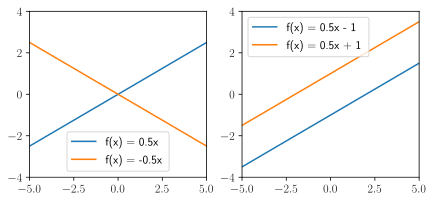

In [25]:
%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 12})
  
fig, ax = plt.subplots(1, 2, figsize=(7, 3))

x = np.linspace(-5, 5, 21)

ax[0].plot(x, .5 * x, label=f"f(x) = 0.5x")
ax[0].plot(x, -.5 * x, label=f"f(x) = -0.5x")
ax[0].set(xlim=(-5, 5), ylim=(-4, 4))

ax[1].plot(x, .5 * x - 1, label=f"f(x) = 0.5x - 1")
ax[1].plot(x, .5 * x + 1 , label=f"f(x) = 0.5x + 1")
ax[1].set(xlim=(-5, 5), ylim=(-4, 4))

ax[0].legend()
ax[1].legend()
plt.show()

Usually we are going to fit functions of more than one variable. For instance, an image might have 256x256 pixels. 

Let's look at a function of two variables $f(\underline x; \underline w, b) = w_1 x_1 + w_2 x_2 + b = \underline w^T \underline x = \underline x^T \underline w$ where $\underline x=[x_1, x_2]^T$ and $\underline w=[w_1, w_2]^T$.

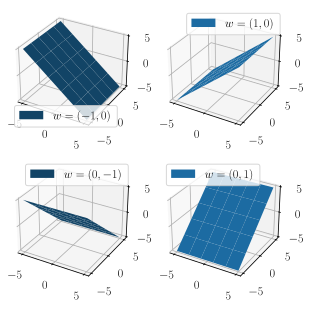

In [26]:
x1 = np.arange(-5, 6, 2)
x2 = np.arange(-5, 6, 2)

x1, x2 = np.meshgrid(x1, x2)
y = x1 + x2

fig, ax = plt.subplots(2, 2, figsize=(5, 5), subplot_kw=dict(projection='3d'))

ax[0, 0].plot_surface(x1, x2, -x1, label="$w=(-1, 0)$")
ax[0, 1].plot_surface(x1, x2,  x1, label="$w=(1, 0)$")
ax[1, 0].plot_surface(x1, x2, -x2, label="$w=(0, -1)$")
ax[1, 1].plot_surface(x1, x2,  x2, label="$w=(0, 1)$")

ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.show()

These are the functions that we are going to fit first, but soon we'd like to fit better ones. Why is that?

Imagine we are trying to build concrete using two ingredients. Say $x_i$ is the quantity of ingredient $i$ and $y$ is the strength of concrete. Why is it a bad idea to model this relationship using a linear function?

- A linear function is not bounded. Concrete probably cannot get infinitely strong if we keep adding ingredients. In fact adding too much of a certain ingredient might damage it;
- A linear function can have negative values. How would we interpret that? There is no standard meaning to negative concrete strength.

For now, let's fit a linear function though. All models are wrong, some are useful - we're going to fit them anyway, but we need to think about what might go wrong and how not to look too stupid. As we are doing machine learning, we aim to fit these functions from data.

# Data

The data $\{ (\underline x^{(n)}, y^{(n)}) \}$ is usually noisy. Our input-output assumption will not fit it perfectly. It should not, to avoid fitting noise.

<img src="Machine Learning/img/1_linear_regression_data.svg" />

We call the difference $r^{(n)} = y^{(n)} - f(\underline x^{(n)}; w, b)$ a residual.

In matrix notation we have:

$$
\underline y = \begin{bmatrix} 
  y^{(1)} \\ 
  y^{(2)} \\ 
  \ldots \\ 
  y^{(N)} 
\end{bmatrix}, 
\underline X = \begin{bmatrix} 
  -\underline x^{(1)}- \\ 
  -\underline x^{(2)}- \\ 
  \ldots \\ 
  x_1^{(N)}, x_2^{(N)}, \ldots, x_D^{(N)}
\end{bmatrix}, 
\underline f = \begin{bmatrix} 
  f(\underline x^{(1)}; \underline w, b) \\ 
  f(\underline x^{(2)}; \underline w, b) \\ 
  \ldots \\ 
  f(\underline x^{(N)}; \underline w, b)
\end{bmatrix}.
$$

$\underline f$ is an $N\times 1$ "matrix" and $X$ and $N \times D$ matrix. $\underline x^{(n)}$ has dimension $D$.

Python weirdness: `y=np.array([1, 2, 3])` is of dimension (3,). `y[:, None]` is of dimension (3, 1).

We'd like to find $\underline w$, of dimension $D \times 1$, such that $\underline f$ is close to $\underline y$.

# Least squares fitting

One possible $\underline w$ is that which minimises the sum of squared residuals $E=\sum_{n=1}^N (y^{(n)} - f(x^{(n)}; w, b))^2$, i.e. $\underline w=argmin_{\underline w}E$. The resulting algorithm is what is known as "least squares".
In matrix notation, $E=(\underline y - \underline f)^T (\underline y - \underline f)$.

Why squared (residuals)? Without the square, $E^{(n)}$ is minimised when $f^{(n)} \rightarrow \infty$. Sum of residual absolut values is another way to address this problem, but the square makes the math that follows nicer.

## Models with zero intercept ($b=0$)

We first consider simple linear models with zero intercept. That is, $f(\underline x; \underline w) = \underline w^T \underline x = \underline x^T \underline w$. Our goal is to find $\underline w$ such that $\underline f=X\underline w$ is close to $\underline y$.

We also say / write:
- "fit $\underline y$ with $\underline f$"
- "$\underline f \approx y$"

to mean the same thing.

In Matlab this can be achieved via `w_fit = X \ y`. In Python `w_fit = np.linalg.lstsq(X, y)[0]`. Here's a Python example.

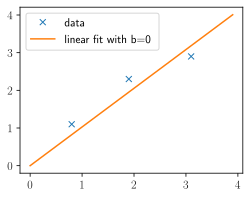

In [27]:
# Three 1-dimensional inputs, i.e. D = {(0.8, 1.1), (1.9, 2.3), (3.1, 2.9)}

# [3, 1]
X = np.array([0.8, 1.9, 3.1]).reshape([3, 1])
y = np.array([1.1, 2.3, 2.9]).reshape([3, 1])

# [1, 1]
w_fit = np.linalg.lstsq(X, y, rcond=None)[0]

# [num_grid_points, 1]
x_grid = np.arange(0, 4, 0.1)[:, None]
f_grid = x_grid.dot(w_fit)

fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(X.squeeze(), y.squeeze(), 'x', label='data')
ax.plot(x_grid.squeeze(), f_grid.squeeze(), label='linear fit with b=0')

ax.legend()
plt.show()

## Models with non-zero intercept

These are models of the form $f(\underline x; \underline w, b) = \underline w^T \underline x + b$.

<img src="Machine Learning/img/1_linear_regression_non_zero_intercept.svg" />

We can use the same code to fit them if with the following data augmentation trick.

Let
$$
\widetilde X = \begin{bmatrix} 
  1, -\underline x^{(1)}- \\ 
  1, -\underline x^{(2)}- \\ 
  \ldots \\ 
  1, x_1^{(N)}, x_2^{(N)}, \ldots, x_D^{(N)}
\end{bmatrix},
$$
i.e. we prepend a column of ones to $X$.

Let also $\tilde{\underline w}=\begin{bmatrix}
  \underline w\\
  -\\
  b
\end{bmatrix}
$
. Note that $|\widetilde X| = N \times (D+1)$, and $|\tilde{\underline w}| = D+1$.

We now fit $\underline y$ with $\tilde{\underline f} = \widetilde X \tilde{\underline w}$. Note that $\widetilde X \tilde{\underline w} = \widetilde X_{:, 1:D} \tilde {\underline w}_{1:D} + \widetilde X_{:, D+1} \underline w_{D+1} = X\underline w + \underline b$. Here, $\underline b=(b, b, \ldots, b)^T$ of dimension $D$.

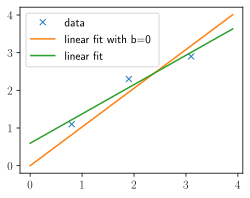

In [28]:
# Three 1-dimensional inputs, i.e. D = {(0.8, 1.1), (1.9, 2.3), (3.1, 2.9)}
X = np.array([0.8, 1.9, 3.1]).reshape([3, 1])
y = np.array([1.1, 2.3, 2.9]).reshape([3, 1])

# [N, D + 1]
X_hat = np.concatenate([X**0, X], axis=1)
# [D + 1, 1]
w_hat_fit = np.linalg.lstsq(X_hat, y, rcond=None)[0]

# [num_grid_points, 1]
x_grid_hat = np.concatenate([x_grid**0, x_grid], axis=1)
f_grid_hat = x_grid_hat.dot(w_hat_fit)

fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(X.squeeze(), y.squeeze(), 'x', label='data')
ax.plot(x_grid.squeeze(), f_grid.squeeze(), label='linear fit with b=0')
ax.plot(x_grid.squeeze(), f_grid_hat.squeeze(), label='linear fit')

ax.legend()
plt.show()

# Basis functions

This will look a bit random at first but bear with me.
Consider K-dimensionals representations $\underline v \phi (\underline x^{(n)})$ of our data points $\underline x^{(n)}$. Stack them into a matrix

$$
\Phi=\begin{bmatrix}
  - \underline v\phi(\underline x^{(1)}) -\\
  - \underline v\phi(\underline x^{(1)}) -\\
  \ldots\\
  - \underline v\phi(\underline x^{(N)}) -
\end{bmatrix}.
$$

## Polynomial Basis Functions

As an example, consider one-dimensional inputs $x$ and let $\underline v\phi(x) = (1, x, x^2, x^3)^T$.
Fit $\underline y \approx \underline f = \Phi \underline w$. For a specific $x$, $f(x) = \underline w^T\underline v\phi(x) = w_1\phi_1(x) + w_2\phi_2(x) + w_3\phi_3(x) + w_4\phi_4(x) = w_1 + w_2 x + w_3 x^2 + w_4 x^3$.

What we have done here is fitted the coefficients of a polynomial (a non-linear function) using linear regression.
The polynomial is a linear combination of our basis functions, $\phi_1(x) = 1$, $\phi_2(x)=x$, $\phi_3(x) = x^2$, and $\phi_4(x) = x^3$.
How do these basis functions look like?

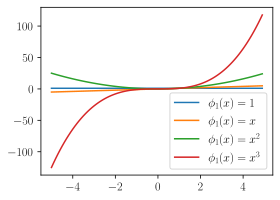

In [29]:
x_grid = np.arange(-5, 5, 0.1)

fig, ax = plt.subplots(figsize=(4, 3))
fig.tight_layout()

plt.rcParams['text.usetex'] = True

ax.plot(x_grid, x_grid**0, label=r'$\phi_1(x)=1$')
ax.plot(x_grid, x_grid, label=r'$\phi_1(x)=x$')
ax.plot(x_grid, x_grid**2, label=r'$\phi_1(x)=x^2$')
ax.plot(x_grid, x_grid**3, label=r'$\phi_1(x)=x^3$')

ax.legend()
plt.show()

With such a combination of basis functions we could fit something like this

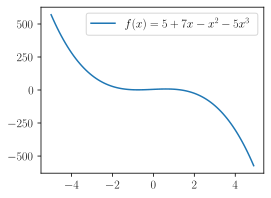

In [30]:
x = np.arange(-5, 5, 0.1)[:, None]

w_fit = np.array([5, 7, -1, -5])[:, None]
Phi = np.concatenate([x**0, x, x**2, x**3], axis=1)
f = Phi.dot(w_fit)

fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(x.squeeze(), f.squeeze(), label=f'$f(x)=5 + 7x - x^2 -5x^3$')

ax.legend()
plt.show()

We can interpret the process as decomposing the function above into a weighted sum of our basis functions.

Polynomial basis functions are not commonly used, mostly because of being unbounded. The resulting function (which is a linear combination of polynomial basis functions) might do well in regions where we have tranining points, but go crazy where we don't.

Say we have 3-dimensional inputs $\underline x=(x_1, x_2, x_3)^T$. If we are using polynomial basis functions, what should $\underline\phi(\underline x)$ be?

- if we want to fit a linear function we can have: $\underline\phi(\underline x)=(1, x_1, x_2, x_3)^T$;
- if we want to fit a ball-shaped (minge) curve we might want quadratic functions as well: $\underline\phi(\underline x) += (x_1^2, x_2^2, x_3^2)^T$. But these terms do not describe an arbitrary ball. They assume that the directions where the ball is steep are aligned with our original features $x_1$, $x_2$, and $x_3$. We cannot have elliptical ball shape which is skewed in a certain direction;
- We can also add $\underline\phi(\underline x) += (x_1 x_2, x_1 x_3, x_2 x_3, x_1^3, x_1 x_2 x_3, \ldots)^T$.

The point is: yes we may be able to represent arbitrary functions with polynomial basis functions, but we may need a huge amount of basis functions and might run out of memory fast if we need to store all of them.

So polynomial basis functions (a) are unbounded (b) we might need a lot of them. But what if most of them are 0? This can be the case when we have binary input features, when polynomial basis functions can be useful. Say $x_1$ is 1 when the word "New" is in a document and $x_2$ is 1 when the word "York" is. We might want a basis function $x_1 x_2$ that is 1 for documents containing both words, documents which perhaps talk about New York City. 

The nice thing about this is that many such basis functions will be 0 so the $\underline\phi(\underline x)$ will be sparse and can be efficiently stored (little memory used) by storing positions of the (hopefully few) non-zero elements.

## Radial Basis Functions (RBFs)

Let $\underline x$ be a vector of features, e.g. ingredients of concrete, words in an email.
$\phi_{RBF}(\underline x; \underline c, h) = \exp[-(\underline x - \underline c)^T(\underline x - \underline c)/h]$. If $|\underline x|=1$, this is $\phi_{RBF}(x; c, h) = \exp[(x - c)^2 / h]$. 

The distance from the centre of RBF to its point of inflection is $h/\sqrt{2}$. Thus, the point of inflection is at $\underline x_{infl}=(\underline c + h/\sqrt{2})$. Here's how it looks like for 1D inputs.

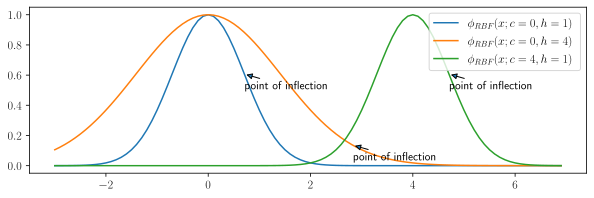

In [31]:
x = np.arange(-3, 7, 0.1)
RBF = lambda x, c, h: np.exp(-(x - c)**2 / h)

fig, ax = plt.subplots(figsize=(10, 3))

for c, h in [(0, 1), (0, 4), (4, 1)]:
    ax.plot(x, RBF(x, c, h), label=f'$\phi_{{RBF}}(x; c={c}, h={h})$')
    inf_x = c + h / np.sqrt(2)
    inf_y = RBF(inf_x, c, h)
    ax.annotate(
        'point of inflection', (inf_x, inf_y), (inf_x, inf_y - 0.1),
        arrowprops={"arrowstyle": "-|>"}
    )

ax.legend()
plt.show()

and here it is for 2D inputs

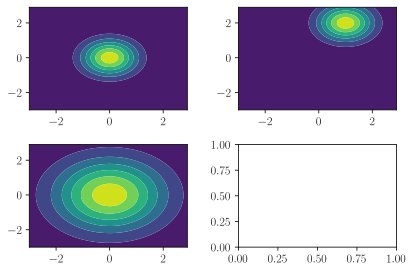

In [32]:
interval = np.arange(-3, 3, 0.1)
x1, x2 = np.meshgrid(interval, interval)

fig, ax = plt.subplots(2, 2, figsize=(6, 4))
fig.tight_layout()

# centred at (0, 0)
ax[0, 0].contourf(x1, x2, np.exp(-((x1 - 0)**2 + (x2 - 0)**2) / 1))
# centred at (1, 2)
ax[0, 1].contourf(x1, x2, np.exp(-((x1 - 1)**2 + (x2 - 2)**2) / 1))
# centred at (0, 0), 4 times more spread out
ax[1, 0].contourf(x1, x2, np.exp(-((x1 - 0)**2 + (x2 - 0)**2) / 4))

plt.show()

RBF "measures" how close we are ($\underline x$ is) to the centre $\underline c$. At $\underline x=\underline c$, it's value is 1. Far away, its value tends to $0$; The weights can be seen as a rating of the importance of this difference.


Using RBFs as basis functions, we can fit highly non-linear functions $\underline f(x)=\underline w^T\underline v \phi(x)$ using linear regression. These fitted functions are linear combinations of RBFs. Here's such a (random) function.

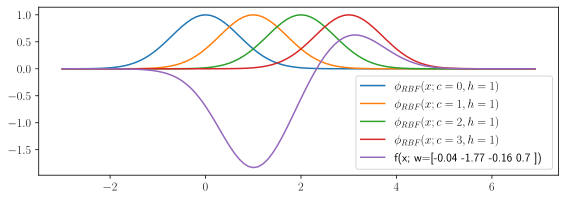

In [44]:
np.set_printoptions(precision=2)

x = np.arange(-3, 7, 0.1)
RBF=lambda x, c, h: np.exp(-(x - c)**2 / h)

bases = []

fig, ax = plt.subplots(figsize=(8, 3))
fig.tight_layout()
fig.canvas.header_visible = False

for c, h in [(0, 1), (1, 1), (2, 1), (3, 1)]:
    base = RBF(x, c, h)
    ax.plot(x, base, label=rf"$\phi_{{RBF}}(x; c={c}, h={h})$")
    bases.append(base)

bases = np.array(bases)
w = np.random.randn(len(bases))[:, None]
f = (bases * w).sum(axis=0)
ax.plot(x, f, label=f'f(x; w={w.squeeze()})')
ax.legend()
plt.show()

RBFs vs Polynomials: RBFs are bounded.

Disadvantage of linear regression with RBFs (and other basis functions): not very good at modelling cliffs (sudden drops in value). RBFs are quite smooth. Ways around:
- A lot of RBFs close to each other. This will make it likely to have one exactly where the cliff should be;
- Know where the cliff should be in advance and manually place an RBF there (i.e. by specifying its parameters). But this requires knowledge in advance;
- Fit RBF parameters to data. That's what neural networks do.

**Good reason to give for not using linear regression: bad at modelling cliffs.**

## Logistic-Sigmoid basis function

$$
\sigma(a)=\frac{1}{1 + e^{-a}}
$$

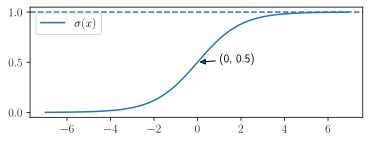

In [46]:
x = np.arange(-7, 7, 0.1)
sigma = lambda x: 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(figsize=(6, 2))

ax.plot(x, sigma(x), label=r'$\sigma(x)$')
ax.annotate('(0, 0.5)', (0, sigma(0)), (1, sigma(0)), arrowprops={"arrowstyle": "-|>"})
ax.axhline(y=1, linestyle='--') 

ax.legend()
plt.show()

As a basis function, $\phi_\sigma(\underline x; \underline v, b)=\sigma(\underline v^T \underline x + b)$. We first measure how far our data is from the parameter $\underline v$ with the inner product $\underline v^T \underline x$. That's a number. We shift that number by adding $b$, getting another number between $-\infty$ and $\infty$, which we squash between 0 or 1. Universal approximation theorem: if we use enough logistic sigmoids we can approximate any function.

Let's look at how the parameters $\underline v$ and $b$ influence the shape and placement of $\phi_\sigma$.

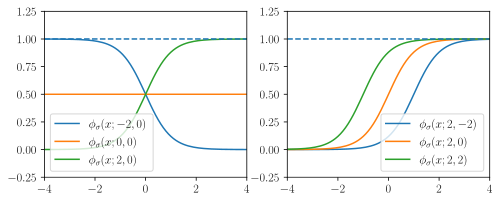

In [35]:
x = np.arange(-10, 10, 0.1)
phi_sigmoid = lambda v, b: 1 / (1 + np.exp(-(v * x + b)))

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

for param in [-2, 0, 2]:
    ax[0].plot(x, phi_sigmoid(param, 0), label=rf'$\phi_\sigma(x; {param}, 0)$')
    ax[1].plot(x, phi_sigmoid(2, param), label=rf'$\phi_\sigma(x; 2, {param})$')

for idx in [0, 1]:
    ax[idx].axhline(y=1, linestyle='--') 
    ax[idx].set(xlim=(-4, 4), ylim=(-0.25, 1.25))
    ax[idx].legend()

plt.show()

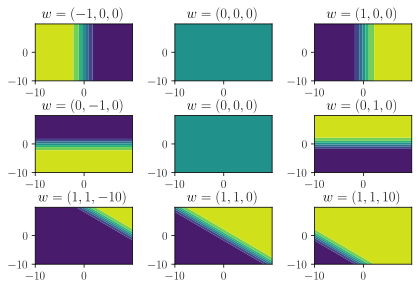

In [36]:
x = np.arange(-10, 10, 0.1)
x1, x2 = np.meshgrid(x, x)
phi_sigmoid = lambda v1, v2, b: 1 / (1 + np.exp(-(v1*x1 + v2*x2 + b)))

fig, ax = plt.subplots(3, 3, figsize=(6, 4))
fig.tight_layout()

for idx, param in enumerate([-1, 0, 1]):
    ax[0, idx].contourf(x1, x2, phi_sigmoid(param, 0, 0))
    ax[1, idx].contourf(x1, x2, phi_sigmoid(0, param, 0))
    ax[2, idx].contourf(x1, x2, phi_sigmoid(1, 1, param * 10))

    ax[0, idx].set(title=f"$w=({param}, 0, 0)$")
    ax[1, idx].set(title=f"$w=(0, {param}, 0)$")
    ax[2, idx].set(title=f"$w=(1, 1, {param * 10})$")

plt.show()

In a way, the sigmoid basis function divides the feature space in half. $\phi_\sigma(\underline x)$ can be seen as a way of specifying what half of the space $\underline x$ is in.

# All together

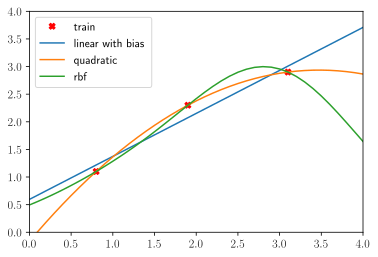

In [37]:
# [3, 1]
X = np.array([0.8, 1.9, 3.1])[:, None]
y = np.array([1.1, 2.3, 2.9])[:, None]
# [grid_size, 1]
X_grid = np.arange(0, 7, 0.1)[:, None]

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(X, y, "X", c="r", label=f'train')

def phi_linear(X):
    return np.concatenate([np.ones_like(X), X], axis=1)
def phi_quadratic(X):
    return np.concatenate([X**0, X, X**2], axis=1)
def rbf(x, c):
    return np.exp(-(x - c)**2 / 2)
def phi_rbf(X):
    return np.concatenate([rbf(X, 1), rbf(X, 2), rbf(X, 3)], axis=1)

def fit_and_plot(phi_fn, X, y, label):
    # X[N, 1] -> Phi[N, K]
    Phi = phi_fn(X)
    # [K, 1]
    w_fit = np.linalg.lstsq(Phi, y, rcond=None)[0]
    # [grid_size, 1]
    f_grid = phi_fn(X_grid).dot(w_fit)

    ax.plot(X_grid, f_grid, label=label)

fit_and_plot(phi_linear, X, y, 'linear with bias')
fit_and_plot(phi_quadratic, X, y, 'quadratic')
fit_and_plot(phi_rbf, X, y, 'rbf')

ax.legend()
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.show()